# Udacity Project - Investigate a dataset

### Project Description
#### Dataset chosen: Titanic

Question to be answered: What factors made people more likely to survive?

The latter question will be analyzed via other (more detailed questions), such as:
1. Does gender has any impact to the survival rate?
2. Does passenger survive because of higher passenger class?
3. What's the range of age have highest rate to survived?

In [57]:
import pandas as pd
import numpy as np
import matplotlib
import csv
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

### READ FROM DATASET
- Survived: (0:No, 1:Yes)
- Pclass: Passenger class (1:First Class, 2:Second Class, 3: 3rd Class)
- Name: Name of the passenger
- Sex: Gender of the passenger
- Age: Age of the passenger
- Fare: Passenger Fare
- Cabin: cabin of the passenger
- Embarked: Embarkation Port (C = Cherbourg, Q = Queenstown, S = Southampton)

In [58]:
df = pd.read_csv('titanic-data.csv')
display(df.head())
print("Data information")
df.info()
print("\nFigure out missing data")
display(df.isnull().sum())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Data information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB

Figure out missing data


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Data Decided to be drop
- PassengerId = The PassengerId just an Id of passenger.
- Cabin - Due to high ammount of NaN data, so decided to drop it.
##### Data don't relate to the question
- SibSp - Passenger of siblings or spouses aboard.
- Parch - Passenger of parents or children aboard.
- Fare - Passenger fare.
- Embarked - Embarkation Port.

In [59]:
df = pd.read_csv('titanic-data.csv')
df.drop(["PassengerId", "SibSp", "Parch", "Ticket", "Cabin", "Embarked","Fare"], axis=1,inplace=True)
rows = df.shape[0]
columns = df.shape[1]
print("The Dataset consist of ",rows," rows of record and ",columns,"columns of the variable.")
display(df.head())
display(df.describe())

The Dataset consist of  891  rows of record and  5 columns of the variable.


,Survived,Pclass,Name,Sex,Age
0,0,3,"Braund, Mr. Owen Harris",male,22.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,1,3,"Heikkinen, Miss. Laina",female,26.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
4,0,3,"Allen, Mr. William Henry",male,35.0


,Survived,Pclass,Age
count,891.000000,891.000000,714.000000
mean,0.383838,2.308642,29.699118
std,0.486592,0.836071,14.526497
min,0.000000,1.000000,0.420000
25%,0.000000,2.000000,20.125000
50%,0.000000,3.000000,28.000000
75%,1.000000,3.000000,38.000000
max,1.000000,3.000000,80.000000


## Does gender has any impact to the survival rate?

We had total number of 891 record with 577 male and 314 female.
Total of 577 Male, 109 survive and 468 not survive.
Total of 314 Female, 233 survive and 81 not survive.


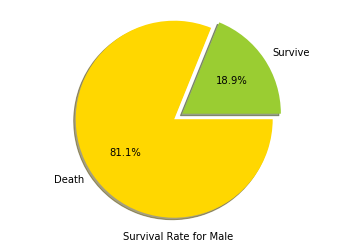

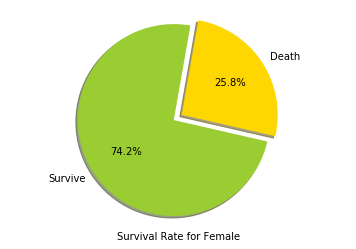

In [60]:
num_passenger = df.shape[0]
num_male = df.loc[df['Sex'] == "male"].shape[0]
num_female = df.loc[df['Sex'] == "female"].shape[0]

print ("We had total number of {} record with {} male and {} female.".format(num_passenger, num_male, num_female))

survived_male = (df['Sex'] == "male") & (df['Survived'] == 1)
survived_female = (df['Sex'] == "female") & (df['Survived'] == 1)

num_survived_male = df.loc[survived_male].shape[0]
num_survived_female = df.loc[survived_female].shape[0]
num_not_survived_male = num_male - num_survived_male
num_not_survived_female = num_female - num_survived_female
print("Total of {} Male, {} survive and {} not survive.".format(num_male, num_survived_male, num_not_survived_male))
print("Total of {} Female, {} survive and {} not survive.".format(num_female, num_survived_female, num_not_survived_female))

# Data to plot
labels = 'Survive', 'Death'
sizes = [num_survived_male, num_not_survived_male]
colors = ['yellowgreen', 'gold']
explode = (0.1, 0)

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.xlabel('Survival Rate for Male')
plt.show()

# Data to plot
labels = 'Survive', 'Death'
sizes = [num_survived_female, num_not_survived_female]
colors = ['yellowgreen', 'gold']
explode = (0.1, 0)

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=80)
plt.axis('equal')
plt.xlabel('Survival Rate for Female')
plt.show()

### Answer: Wow! There's a 74.2% survival rate for female and only 18.9% for male.

## Does passenger survive because of higher passenger class?

We had total number of 891 record with 216 for first class and 184 for second class and 491 for third class.
Total of 216 in first class, 136 survive and 80 not survive.
Total of 184 in first class, 87 survive and 97 not survive.
Total of 491 in first class, 119 survive and 372 not survive.


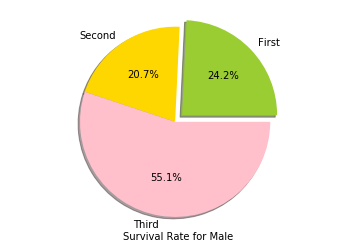

In [67]:
num_passenger = df.shape[0]
num_Pclass_1 = df.loc[df['Pclass'] == 1].shape[0]
num_Pclass_2 = df.loc[df['Pclass'] == 2].shape[0]
num_Pclass_3 = df.loc[df['Pclass'] == 3].shape[0]

print ("We had total number of {} record with {} for first class and {} for second class and {} for third class.".format(num_passenger, num_Pclass_1, num_Pclass_2,num_Pclass_3))

survived_Pclass_1 = (df['Pclass'] == 1) & (df['Survived'] == 1)
survived_Pclass_2 = (df['Pclass'] == 2) & (df['Survived'] == 1)
survived_Pclass_3 = (df['Pclass'] == 3) & (df['Survived'] == 1)

num_survived_Pclass_1 = df.loc[survived_Pclass_1].shape[0]
num_survived_Pclass_2 = df.loc[survived_Pclass_2].shape[0]
num_survived_Pclass_3 = df.loc[survived_Pclass_3].shape[0]

num_not_survived_Pclass_1 = num_Pclass_1 - num_survived_Pclass_1
num_not_survived_Pclass_2 = num_Pclass_2 - num_survived_Pclass_2
num_not_survived_Pclass_3 = num_Pclass_3 - num_survived_Pclass_3
print("Total of {} in first class, {} survive and {} not survive.".format(num_Pclass_1, num_survived_Pclass_1, num_not_survived_Pclass_1))
print("Total of {} in first class, {} survive and {} not survive.".format(num_Pclass_2, num_survived_Pclass_2, num_not_survived_Pclass_2))
print("Total of {} in first class, {} survive and {} not survive.".format(num_Pclass_3, num_survived_Pclass_3, num_not_survived_Pclass_3))


# Data to plot
labels = 'First', 'Second', 'Third'
sizes = [num_Pclass_1, num_Pclass_2,num_Pclass_3]
colors = ['yellowgreen', 'gold', 'pink']
explode = (0.1, 0, 0)

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.xlabel('Survival Rate for Male')
plt.show()

## What's the range of age have highest rate to survived?